In [3]:
#爬取掏寶網

'\r\n<!DOCTYPE html>\n<html lang="zh-CN">\n<head>\n    <meta charset="UTF-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="renderer" content="webkit">\n    <meta name="data-spm" content="a230r">\n    <link rel="dns-prefetch" href="//g.alicdn.com">\n    <link rel="dns-prefetch" href="//assets.alicdn.com">\n    <link rel="dns-prefetch" href="//img.alicdn.com">\n    <link rel="dns-prefetch" href="//g-search1.alicdn.com">\n    <link rel="dns-prefetch" href="//g-search2.alicdn.com">\n    <link rel="dns-prefetch" href="//g-search3.alicdn.com">\n    <link rel="dns-prefetch" href="//g-search4.alicdn.com">\n    <link rel="dns-prefetch" href="//gtms01.alicdn.com">\n    <link rel="dns-prefetch" href="//gtms02.alicdn.com">\n    <link rel="dns-prefetch" href="//gtms03.alicdn.com">\n    <link rel="dns-prefetch" href="//gtms04.alicdn.com">\n    <link rel="shortcut icon" href="//www.taobao.com/favicon.ico">\n    <meta name="description" content="淘宝搜索是最智能的商品搜索引擎，通过大数据的运营，
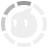

In [9]:
import requests
from bs4  import BeautifulSoup

url='https://s.taobao.com/search?q=%E5%A5%B3%E8%A3%85&imgfile=&js=1&stats_click=search_radio_all%3A1&initiative_id=staobaoz_20180313&ie=utf8'
res=requests.get(url)
res.text


### 網頁按右鍵後的檢查\Network\Doc\Response的內容複製到Notepad+去檢查是否有網頁上的價格
### 比如1926,299等，發現有包含則找對位置。接著看包含這個資訊的內容在哪裡?
### 可以看到是存在g_page_config的地方


<!DOCTYPE html>

<html lang="zh-CN">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="webkit" name="renderer"/>
<meta content="a230r" name="data-spm"/>
<link href="//g.alicdn.com" rel="dns-prefetch"/>
<link href="//assets.alicdn.com" rel="dns-prefetch"/>
<link href="//img.alicdn.com" rel="dns-prefetch"/>
<link href="//g-search1.alicdn.com" rel="dns-prefetch"/>
<link href="//g-search2.alicdn.com" rel="dns-prefetch"/>
<link href="//g-search3.alicdn.com" rel="dns-prefetch"/>
<link href="//g-search4.alicdn.com" rel="dns-prefetch"/>
<link href="//gtms01.alicdn.com" rel="dns-prefetch"/>
<link href="//gtms02.alicdn.com" rel="dns-prefetch"/>
<link href="//gtms03.alicdn.com" rel="dns-prefetch"/>
<link href="//gtms04.alicdn.com" rel="dns-prefetch"/>
<link href="//www.taobao.com/favicon.ico" rel="shortcut icon"/>
<meta content="淘宝搜索是最智能的商品搜索引擎，通过大数据的运营，准确的理解商品与用户，提供精准的个性化搜索体验。" name="description"/>
<meta content="女装,女装_淘宝网,女装_淘宝搜索" name="keywor
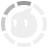

In [11]:
soup = BeautifulSoup(res.text, "html.parser")
print(soup)

In [12]:
g_page_config = soup.select("script")[7].text
print(g_page_config)


        
    g_page_config = {"pageName":"mainsrp","mods":{"shopcombotip":{"status":"hide"},"phonenav":{"status":"hide"},"debugbar":{"status":"hide"},"shopcombo":{"status":"hide"},"itemlist":{"status":"show","data":{"postFeeText":"运费","trace":"msrp_auction","auctions":[{"p4p":1,"p4pSameHeight":true,"nid":"557593283544","category":"","pid":"","title":"职业装\u003cspan class\u003dH\u003e女装\u003c/span\u003e套装马甲三件套春秋美容院 酒店前台工作服KTV工装女","raw_title":"职业装女装套装马甲三件套秋冬美容院 酒店","pic_url":"//g-search1.alicdn.com/img/bao/uploaded/i4/imgextra/i3/96880893/TB2mMMPiN6I8KJjSszfXXaZVXXa_!!0-saturn_solar.jpg","detail_url":"https://click.simba.taobao.com/cc_im?p\u003d%C5%AE%D7%B0\u0026s\u003d217985962\u0026k\u003d513\u0026e\u003dnMsrBBpCBLGQtAKVOOzeEHvkUqiKUTuD0fDLyJHHUDp1k8jr01P7Fg4sb57mPAL4tFBNBvEI2%2BnIz5u%2F9f2u%2B38QQCOVFzT65dpPjy0IiNcZYL0X7uLJRoReuRHRu21DmKyXFIlWgHzyx95qQrjTHnHIHa9ftRJDnEckdzT8FlZNylaGSIPDPP6yZTagzXInYDFqHWGMlEe10xOBTDD109m7bXZpnE95r25iYnyIEi%2F3URiS33XWx1wmxnj7CvtxaX%2F%2BYtPpmLa2BSbJoX